Only Feature Engineering Stuff

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = 'smoking_driking_dataset_Ver01.csv'
column_names = [ 'sex', 'age', 'height', 'weight', 'waistline',
    'sight_left', 'sight_right',
    'hear_left', 'hear_right',
    'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',
    'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine',
    'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'
]

# Load the dataset with specified column names
df = pd.read_csv(file_path, header=0, names=column_names)

# Display the first few rows of the dataframe
#print(df.head())

# Drop rows with any missing values
df = df.dropna()
#len(df)

In [7]:
# Select random 100,000 records from the dataframe
sample_df = df.sample(n=100000, random_state=1)

# Save the sampled dataframe to a new CSV file
sample_file_path = 'smoking_driking_dataset_sampled.csv'
sample_df.to_csv(sample_file_path, index=False)

sample_df.head()
sample_df_no_feature_engg = sample_df.copy()

In [9]:
# FEATURE ENGINEERING

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'hemoglobin',
                      'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']
sample_df[numerical_features] = scaler.fit_transform(sample_df[numerical_features])
#print(sample_df.head())

# new column 'Hearing_State'
sample_df['Hearing_State'] = df.apply(lambda row: 2 if row['hear_left'] == 2 or row['hear_right'] == 2 else 1, axis=1)

# new column 'Sight_State'
#sample_df['Sight_State'] = df.apply(lambda row: 2 if row['sight_left'] == 2 or row['sight_right'] == 2 else 1, axis=1)

# new column 'HDL_LDL_ratio'
sample_df['HDL_LDL_Ratio'] = sample_df['HDL_chole'] / sample_df['LDL_chole']

# new column 'BMI'
sample_df['BMI'] = sample_df['weight'] / ((sample_df['height'] / 100) ** 2)

# new column 'Total_HDL_ratio'
sample_df['Total_HDL_Ratio'] = sample_df['tot_chole'] / sample_df['HDL_chole']

# new column 'Liver_Enzyme_Ratio' (SGOT:SGPT)
sample_df['Liver_Enzyme_Ratio'] = sample_df['SGOT_AST'] / sample_df['SGOT_ALT']

#Smoked [1], Never Smoked [0]
# Categorize smoking status
sample_df['Smoking_Status'] = sample_df['SMK_stat_type_cd'].apply(lambda x: '0' if x == 1 else '1')

# Categorize drinking status
sample_df['Drinking_Status'] = sample_df['DRK_YN'].apply(lambda x: '0' if x == 'N' else '1')

#Smoking Status
sample_df['Smoking_Status'] = pd.to_numeric(sample_df['Smoking_Status'])

#GammaGTP-Liver Damage Score
sample_df['liver_damage_score'] = sample_df['gamma_GTP'] + sample_df['SGOT_ALT']

#Has ever been into drinking or smoking
sample_df['DorS'] = sample_df.apply(lambda row: 1 if row['Smoking_Status'] == 1 or row['Drinking_Status'] == '1' else 0, axis=1)


print(sample_df.columns)


Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN', 'Hearing_State',
       'HDL_LDL_Ratio', 'BMI', 'Total_HDL_Ratio', 'Liver_Enzyme_Ratio',
       'Smoking_Status', 'Drinking_Status', 'liver_damage_score', 'DorS'],
      dtype='object')


In [11]:
sample_df = sample_df.drop(columns=['DRK_YN'])
print(sample_df.columns)

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'Hearing_State', 'HDL_LDL_Ratio',
       'BMI', 'Total_HDL_Ratio', 'Liver_Enzyme_Ratio', 'Smoking_Status',
       'Drinking_Status', 'liver_damage_score', 'DorS'],
      dtype='object')


In [13]:
print(sample_df.columns)
sample_df.to_csv('DorS_FE.csv', index=False)

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'Hearing_State', 'HDL_LDL_Ratio',
       'BMI', 'Total_HDL_Ratio', 'Liver_Enzyme_Ratio', 'Smoking_Status',
       'Drinking_Status', 'liver_damage_score', 'DorS'],
      dtype='object')


In [15]:
sample_df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,SMK_stat_type_cd,Hearing_State,HDL_LDL_Ratio,BMI,Total_HDL_Ratio,Liver_Enzyme_Ratio,Smoking_Status,Drinking_Status,liver_damage_score,DorS
921688,Female,50,155,60,82.0,0.7,0.5,1.0,1.0,0.521217,...,1.0,1,-3.045653,24.973985,0.315012,6.448453,0,1,-0.022885,1
56603,Female,55,155,50,73.2,1.0,0.8,1.0,1.0,-0.508473,...,1.0,1,1.127806,20.811655,0.454888,0.080905,0,0,-0.796735,0
434962,Female,60,160,60,78.0,0.6,0.8,1.0,1.0,-1.744101,...,1.0,1,-1.037596,23.437500,-1.081401,0.329893,0,0,-0.945066,0
742617,Male,35,175,80,94.0,1.2,1.2,1.0,1.0,-0.096597,...,3.0,1,-1.261110,26.122449,-1.650104,-3.175189,1,1,-0.059040,1
604547,Male,45,160,60,82.1,0.9,0.8,1.0,1.0,0.864448,...,1.0,1,2.887429,23.437500,0.777988,-2.383707,0,1,0.326028,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184847,Male,60,165,55,73.0,0.8,0.7,1.0,1.0,-0.233889,...,2.0,1,6.565565,20.202020,0.414577,0.071498,1,0,-0.539940,1
394669,Male,55,160,55,78.0,1.0,1.2,1.0,1.0,-0.165243,...,1.0,1,-0.554569,21.484375,-0.439511,0.668545,0,0,-0.215047,0
129483,Male,40,165,60,77.9,0.2,0.5,1.0,1.0,-0.165243,...,3.0,1,-0.910785,22.038567,-0.411786,0.603032,1,1,-1.093397,1
20786,Female,25,160,45,70.0,2.0,1.5,1.0,1.0,-1.538163,...,1.0,1,-1.550499,17.578125,-0.771975,0.273018,0,0,-0.952990,0


In [17]:
print(sample_df.dtypes)

sex                    object
age                     int64
height                  int64
weight                  int64
waistline             float64
sight_left            float64
sight_right           float64
hear_left             float64
hear_right            float64
SBP                   float64
DBP                   float64
BLDS                  float64
tot_chole             float64
HDL_chole             float64
LDL_chole             float64
triglyceride          float64
hemoglobin            float64
urine_protein         float64
serum_creatinine      float64
SGOT_AST              float64
SGOT_ALT              float64
gamma_GTP             float64
SMK_stat_type_cd      float64
Hearing_State           int64
HDL_LDL_Ratio         float64
BMI                   float64
Total_HDL_Ratio       float64
Liver_Enzyme_Ratio    float64
Smoking_Status          int64
Drinking_Status        object
liver_damage_score    float64
DorS                    int64
dtype: object


In [19]:
# smoking analysis

In [21]:
# smoking and HDL_LDL ratio

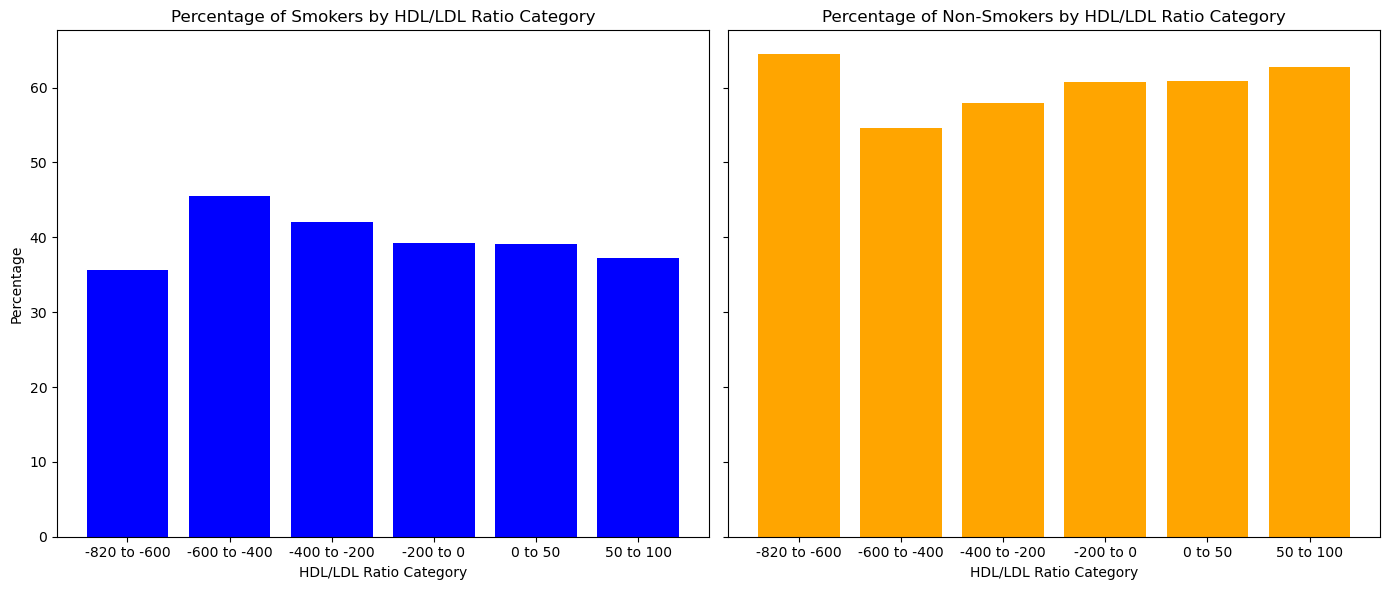

In [23]:

# Define HDL/LDL Ratio categories based on the range of values (-813 to 90.62)
bins = [-820, -600, -400, -200, 0, 50, 100]
labels = ['-820 to -600', '-600 to -400', '-400 to -200', '-200 to 0', '0 to 50', '50 to 100']
sample_df['HDL_LDL_Ratio_category'] = pd.cut(sample_df['HDL_LDL_Ratio'], bins=bins, labels=labels)

# Calculate the total number of people in each HDL/LDL Ratio category
total_counts = sample_df['HDL_LDL_Ratio_category'].value_counts(sort=False)

# Count the number of smokers in each HDL/LDL Ratio category
smoker_counts_hdl_ldl = sample_df[sample_df['Smoking_Status'] == 1]['HDL_LDL_Ratio_category'].value_counts(sort=False)

# Calculate the percentage of smokers within each HDL/LDL Ratio category
percentage_smoker_hdl_ldl = (smoker_counts_hdl_ldl / total_counts) * 100

# Count the number of non-smokers in each HDL/LDL Ratio category
non_smoker_counts_hdl_ldl = sample_df[sample_df['Smoking_Status'] == 0]['HDL_LDL_Ratio_category'].value_counts(sort=False)

# Calculate the percentage of non-smokers within each HDL/LDL Ratio category
percentage_non_smoker_hdl_ldl = (non_smoker_counts_hdl_ldl / total_counts) * 100

# Create side-by-side bar plots to compare the percentage of smokers and non-smokers by HDL/LDL Ratio category
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the percentage of smokers by HDL/LDL Ratio category
axs[0].bar(percentage_smoker_hdl_ldl.index, percentage_smoker_hdl_ldl, color='blue')
axs[0].set_title('Percentage of Smokers by HDL/LDL Ratio Category')
axs[0].set_xlabel('HDL/LDL Ratio Category')
axs[0].set_ylabel('Percentage')

# Plot the percentage of non-smokers by HDL/LDL Ratio category
axs[1].bar(percentage_non_smoker_hdl_ldl.index, percentage_non_smoker_hdl_ldl, color='orange')
axs[1].set_title('Percentage of Non-Smokers by HDL/LDL Ratio Category')
axs[1].set_xlabel('HDL/LDL Ratio Category')

# Adjust the layout to ensure the plots do not overlap
plt.tight_layout()

# Display the side-by-side bar plots
plt.show()


In [14]:
# smoking and bmi analysis

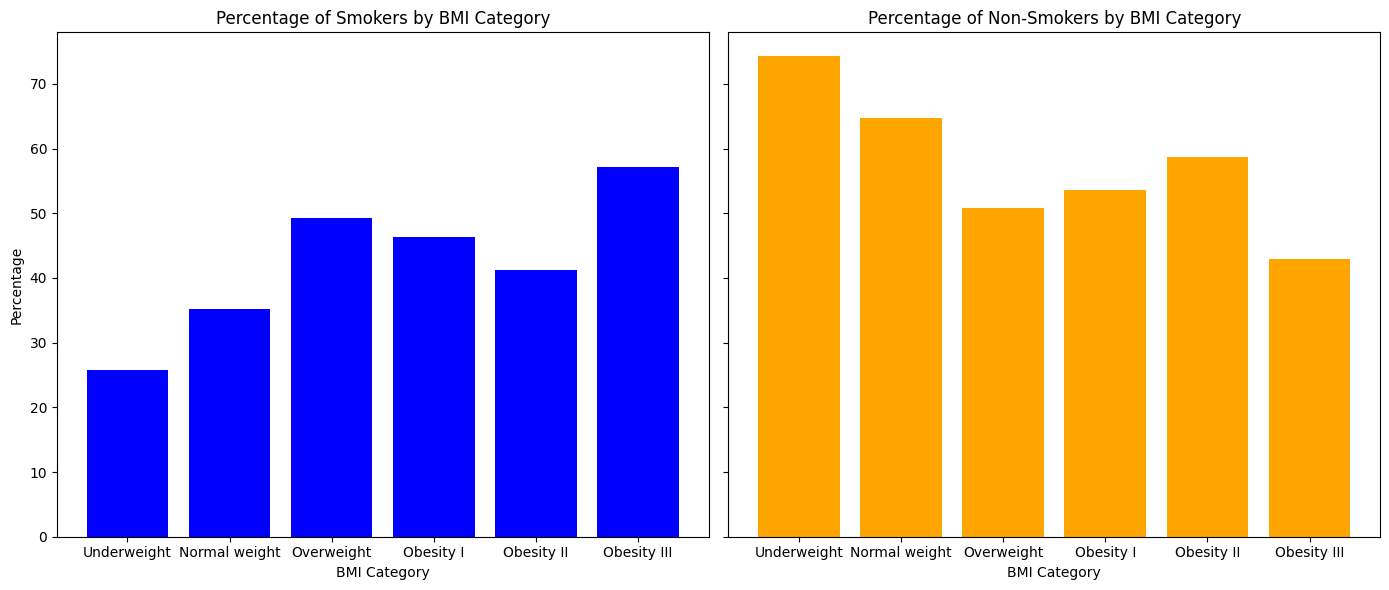

In [15]:
# Define BMI categories based on the range of values (14 to 44)
bins = [14, 18.5, 25, 30, 35, 40, 45]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
sample_df['BMI_category'] = pd.cut(sample_df['BMI'], bins=bins, labels=labels)

# Calculate the total number of people in each BMI category
total_counts = sample_df['BMI_category'].value_counts(sort=False)

# Count the number of smokers in each BMI category
smoker_counts_bmi = sample_df[sample_df['Smoking_Status'] == 1]['BMI_category'].value_counts(sort=False)

# Calculate the percentage of smokers within each BMI category
percentage_smoker_bmi = (smoker_counts_bmi / total_counts) * 100

# Count the number of non-smokers in each BMI category
non_smoker_counts_bmi = sample_df[sample_df['Smoking_Status'] == 0]['BMI_category'].value_counts(sort=False)

# Calculate the percentage of non-smokers within each BMI category
percentage_non_smoker_bmi = (non_smoker_counts_bmi / total_counts) * 100

# Create side-by-side bar plots to compare the percentage of smokers and non-smokers by BMI category
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the percentage of smokers by BMI category
axs[0].bar(percentage_smoker_bmi.index, percentage_smoker_bmi, color='blue')
axs[0].set_title('Percentage of Smokers by BMI Category')
axs[0].set_xlabel('BMI Category')
axs[0].set_ylabel('Percentage')

# Plot the percentage of non-smokers by BMI category
axs[1].bar(percentage_non_smoker_bmi.index, percentage_non_smoker_bmi, color='orange')
axs[1].set_title('Percentage of Non-Smokers by BMI Category')
axs[1].set_xlabel('BMI Category')

# Adjust the layout to ensure the plots do not overlap
plt.tight_layout()

# Display the side-by-side bar plots
plt.show()


In [ ]:
# smoking and Total_HDL_Ratio

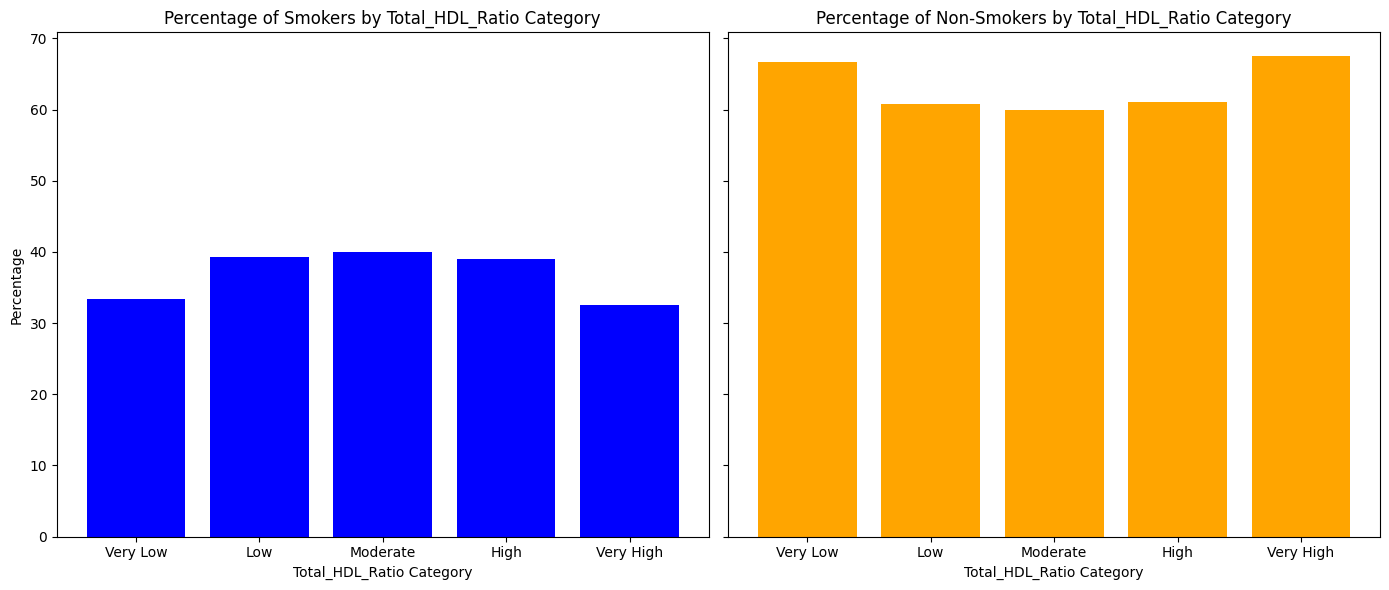

In [16]:
# Define Total_HDL_Ratio categories based on the range of values (-2397 to 921)
bins = [-2400, -1500, -500, 0, 500, 1000]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
sample_df['Total_HDL_Ratio_category'] = pd.cut(sample_df['Total_HDL_Ratio'], bins=bins, labels=labels)

# Calculate the total number of people in each Total_HDL_Ratio category
total_counts = sample_df['Total_HDL_Ratio_category'].value_counts(sort=False)

# Count the number of smokers in each Total_HDL_Ratio category
smoker_counts_hdl_ratio = sample_df[sample_df['Smoking_Status'] == 1]['Total_HDL_Ratio_category'].value_counts(sort=False)

# Calculate the percentage of smokers within each Total_HDL_Ratio category
percentage_smoker_hdl_ratio = (smoker_counts_hdl_ratio / total_counts) * 100

# Count the number of non-smokers in each Total_HDL_Ratio category
non_smoker_counts_hdl_ratio = sample_df[sample_df['Smoking_Status'] == 0]['Total_HDL_Ratio_category'].value_counts(sort=False)

# Calculate the percentage of non-smokers within each Total_HDL_Ratio category
percentage_non_smoker_hdl_ratio = (non_smoker_counts_hdl_ratio / total_counts) * 100

# Create side-by-side bar plots to compare the percentage of smokers and non-smokers by Total_HDL_Ratio category
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the percentage of smokers by Total_HDL_Ratio category
axs[0].bar(percentage_smoker_hdl_ratio.index, percentage_smoker_hdl_ratio, color='blue')
axs[0].set_title('Percentage of Smokers by Total_HDL_Ratio Category')
axs[0].set_xlabel('Total_HDL_Ratio Category')
axs[0].set_ylabel('Percentage')

# Plot the percentage of non-smokers by Total_HDL_Ratio category
axs[1].bar(percentage_non_smoker_hdl_ratio.index, percentage_non_smoker_hdl_ratio, color='orange')
axs[1].set_title('Percentage of Non-Smokers by Total_HDL_Ratio Category')
axs[1].set_xlabel('Total_HDL_Ratio Category')

# Adjust the layout to ensure the plots do not overlap
plt.tight_layout()

# Display the side-by-side bar plots
plt.show()

In [ ]:
# smoking and liver enzyme ratio

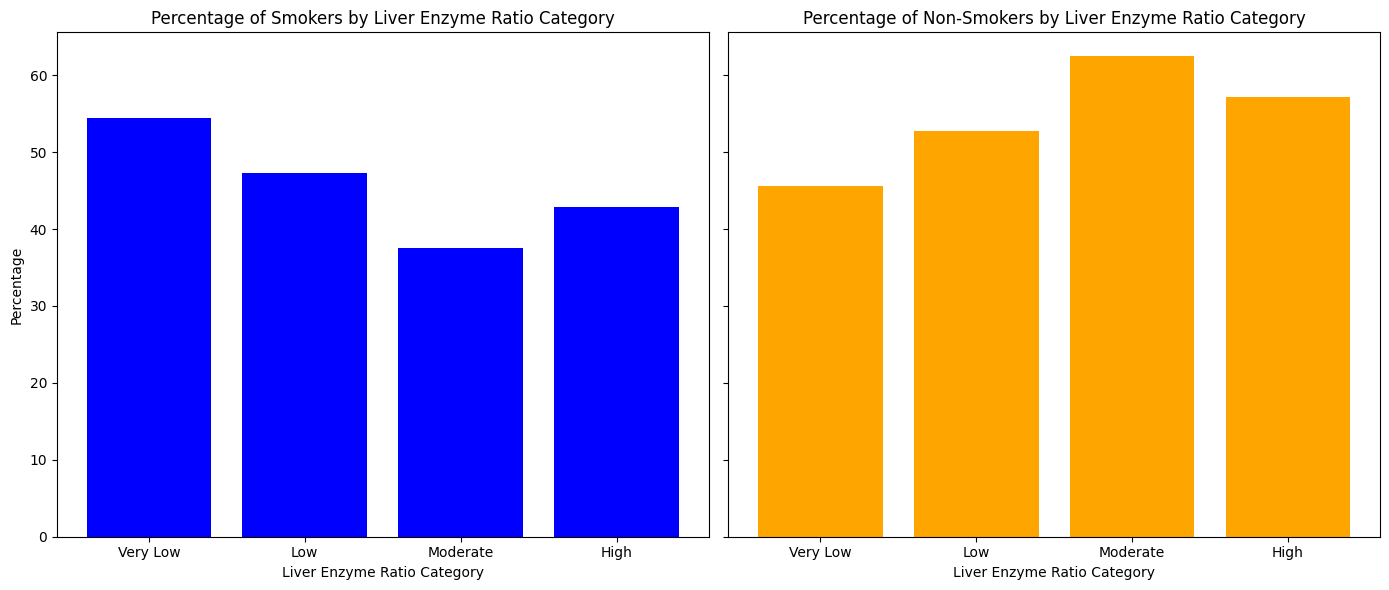

In [17]:

# Define Liver_Enzyme_Ratio categories based on the range of values (-106 to 100)
bins = [-110, -50, 0, 50, 100]
labels = ['Very Low', 'Low', 'Moderate', 'High']
sample_df['Liver_Enzyme_Ratio_category'] = pd.cut(sample_df['Liver_Enzyme_Ratio'], bins=bins, labels=labels)

# Calculate the total number of people in each Liver_Enzyme_Ratio category
total_counts = sample_df['Liver_Enzyme_Ratio_category'].value_counts(sort=False)

# Count the number of smokers in each Liver_Enzyme_Ratio category
smoker_counts_liver_enzyme = sample_df[sample_df['Smoking_Status'] == 1]['Liver_Enzyme_Ratio_category'].value_counts(sort=False)

# Calculate the percentage of smokers within each Liver_Enzyme_Ratio category
percentage_smoker_liver_enzyme = (smoker_counts_liver_enzyme / total_counts) * 100

# Count the number of non-smokers in each Liver_Enzyme_Ratio category
non_smoker_counts_liver_enzyme = sample_df[sample_df['Smoking_Status'] == 0]['Liver_Enzyme_Ratio_category'].value_counts(sort=False)

# Calculate the percentage of non-smokers within each Liver_Enzyme_Ratio category
percentage_non_smoker_liver_enzyme = (non_smoker_counts_liver_enzyme / total_counts) * 100

# Create side-by-side bar plots to compare the percentage of smokers and non-smokers by Liver_Enzyme_Ratio category
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the percentage of smokers by Liver_Enzyme_Ratio category
axs[0].bar(percentage_smoker_liver_enzyme.index, percentage_smoker_liver_enzyme, color='blue')
axs[0].set_title('Percentage of Smokers by Liver Enzyme Ratio Category')
axs[0].set_xlabel('Liver Enzyme Ratio Category')
axs[0].set_ylabel('Percentage')

# Plot the percentage of non-smokers by Liver_Enzyme_Ratio category
axs[1].bar(percentage_non_smoker_liver_enzyme.index, percentage_non_smoker_liver_enzyme, color='orange')
axs[1].set_title('Percentage of Non-Smokers by Liver Enzyme Ratio Category')
axs[1].set_xlabel('Liver Enzyme Ratio Category')

# Adjust the layout to ensure the plots do not overlap
plt.tight_layout()

# Display the side-by-side bar plots
plt.show()


In [ ]:
# smoking and liver damage score

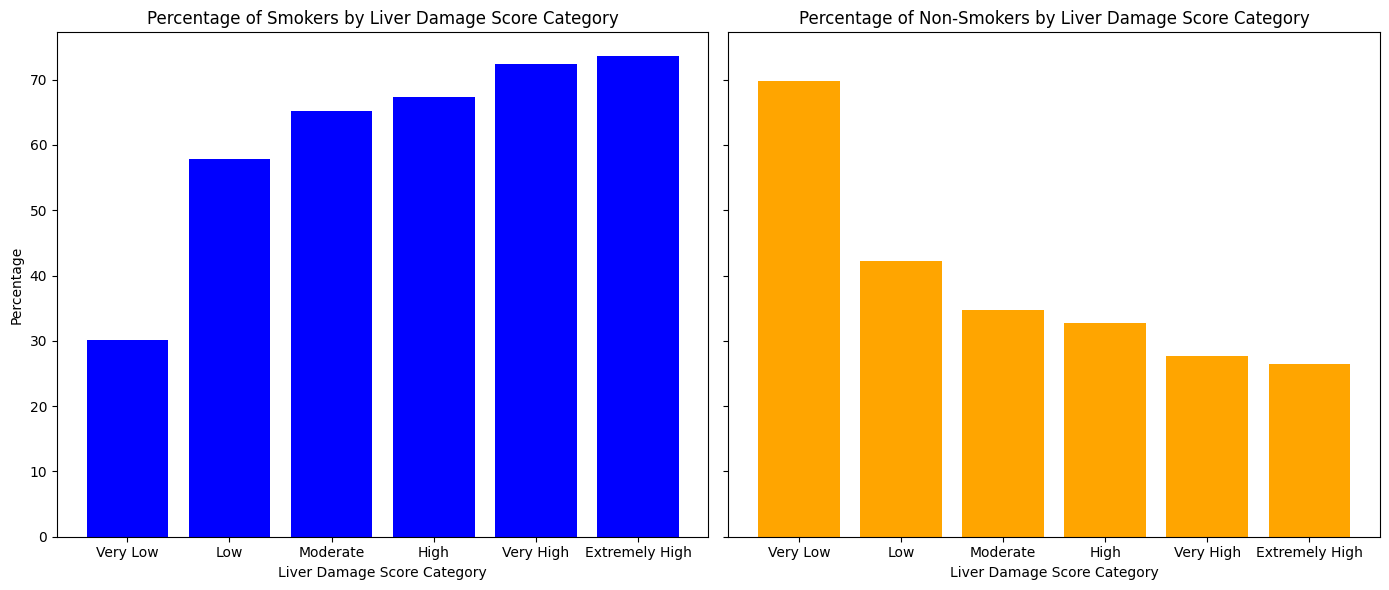

In [18]:

# Define liver_damage_score categories based on the range of values (-1.5 to 10)
bins = [-2, 0, 2, 4, 6, 8, 10]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely High']
sample_df['liver_damage_score_category'] = pd.cut(sample_df['liver_damage_score'], bins=bins, labels=labels)

# Calculate the total number of people in each liver_damage_score category
total_counts = sample_df['liver_damage_score_category'].value_counts(sort=False)

# Count the number of smokers in each liver_damage_score category
smoker_counts_liver_damage = sample_df[sample_df['Smoking_Status'] == 1]['liver_damage_score_category'].value_counts(sort=False)

# Calculate the percentage of smokers within each liver_damage_score category
percentage_smoker_liver_damage = (smoker_counts_liver_damage / total_counts) * 100

# Count the number of non-smokers in each liver_damage_score category
non_smoker_counts_liver_damage = sample_df[sample_df['Smoking_Status'] == 0]['liver_damage_score_category'].value_counts(sort=False)

# Calculate the percentage of non-smokers within each liver_damage_score category
percentage_non_smoker_liver_damage = (non_smoker_counts_liver_damage / total_counts) * 100

# Create side-by-side bar plots to compare the percentage of smokers and non-smokers by liver_damage_score category
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the percentage of smokers by liver_damage_score category
axs[0].bar(percentage_smoker_liver_damage.index, percentage_smoker_liver_damage, color='blue')
axs[0].set_title('Percentage of Smokers by Liver Damage Score Category')
axs[0].set_xlabel('Liver Damage Score Category')
axs[0].set_ylabel('Percentage')

# Plot the percentage of non-smokers by liver_damage_score category
axs[1].bar(percentage_non_smoker_liver_damage.index, percentage_non_smoker_liver_damage, color='orange')
axs[1].set_title('Percentage of Non-Smokers by Liver Damage Score Category')
axs[1].set_xlabel('Liver Damage Score Category')

# Adjust the layout to ensure the plots do not overlap
plt.tight_layout()

# Display the side-by-side bar plots
plt.show()


In [19]:
# drinking analysis

In [20]:
# drinking and HDL_LDL ratio

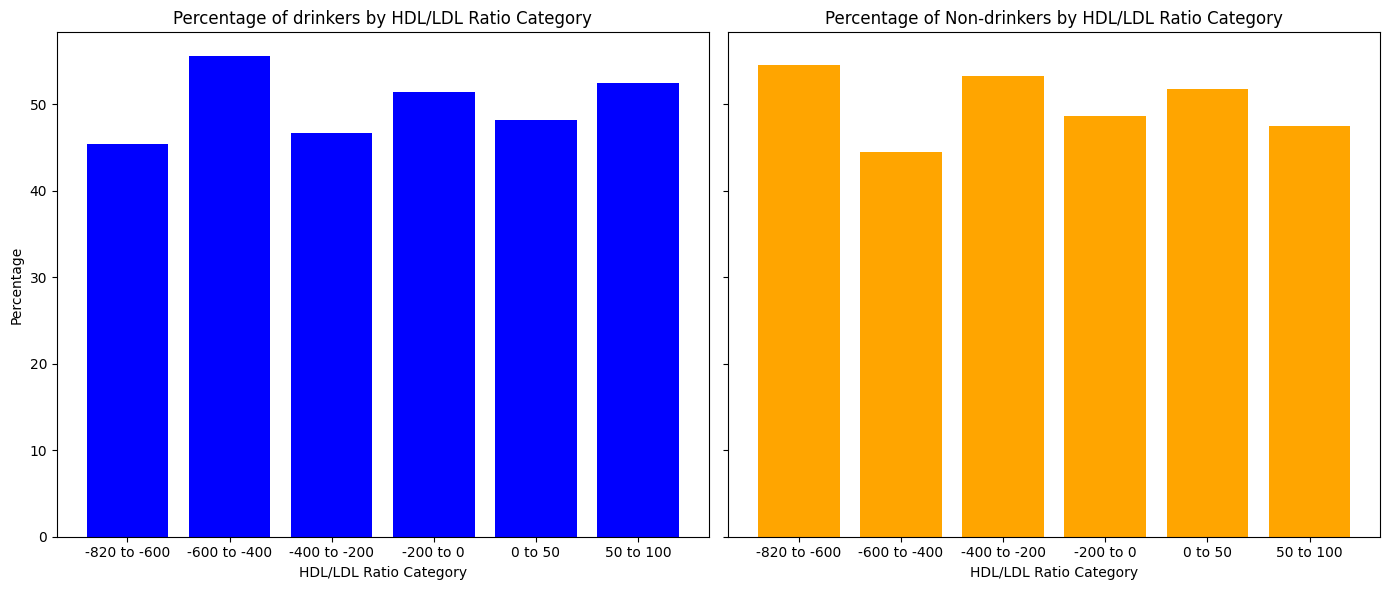

In [25]:

# Define HDL/LDL Ratio categories based on the range of values (-813 to 90.62)
bins = [-820, -600, -400, -200, 0, 50, 100]
labels = ['-820 to -600', '-600 to -400', '-400 to -200', '-200 to 0', '0 to 50', '50 to 100']
sample_df['HDL_LDL_Ratio_category'] = pd.cut(sample_df['HDL_LDL_Ratio'], bins=bins, labels=labels)

# Calculate the total number of people in each HDL/LDL Ratio category
total_counts = sample_df['HDL_LDL_Ratio_category'].value_counts(sort=False)

# Count the number of drinkers in each HDL/LDL Ratio category
drinker_counts_hdl_ldl = sample_df[sample_df['Drinking_Status'] == '1']['HDL_LDL_Ratio_category'].value_counts(sort=False)

# Calculate the percentage of drinkers within each HDL/LDL Ratio category
percentage_drinker_hdl_ldl = (drinker_counts_hdl_ldl / total_counts) * 100

# Count the number of non-drinkers in each HDL/LDL Ratio category
non_drinker_counts_hdl_ldl = sample_df[sample_df['Drinking_Status'] == '0']['HDL_LDL_Ratio_category'].value_counts(sort=False)

# Calculate the percentage of non-drinkers within each HDL/LDL Ratio category
percentage_non_drinker_hdl_ldl = (non_drinker_counts_hdl_ldl / total_counts) * 100

# Create side-by-side bar plots to compare the percentage of drinkers and non-drinkers by HDL/LDL Ratio category
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the percentage of drinkers by HDL/LDL Ratio category
axs[0].bar(percentage_drinker_hdl_ldl.index, percentage_drinker_hdl_ldl, color='blue')
axs[0].set_title('Percentage of drinkers by HDL/LDL Ratio Category')
axs[0].set_xlabel('HDL/LDL Ratio Category')
axs[0].set_ylabel('Percentage')

# Plot the percentage of non-drinkers by HDL/LDL Ratio category
axs[1].bar(percentage_non_drinker_hdl_ldl.index, percentage_non_drinker_hdl_ldl, color='orange')
axs[1].set_title('Percentage of Non-drinkers by HDL/LDL Ratio Category')
axs[1].set_xlabel('HDL/LDL Ratio Category')

# Adjust the layout to ensure the plots do not overlap
plt.tight_layout()

# Display the side-by-side bar plots
plt.show()


In [31]:
# drinking and bmi analysis

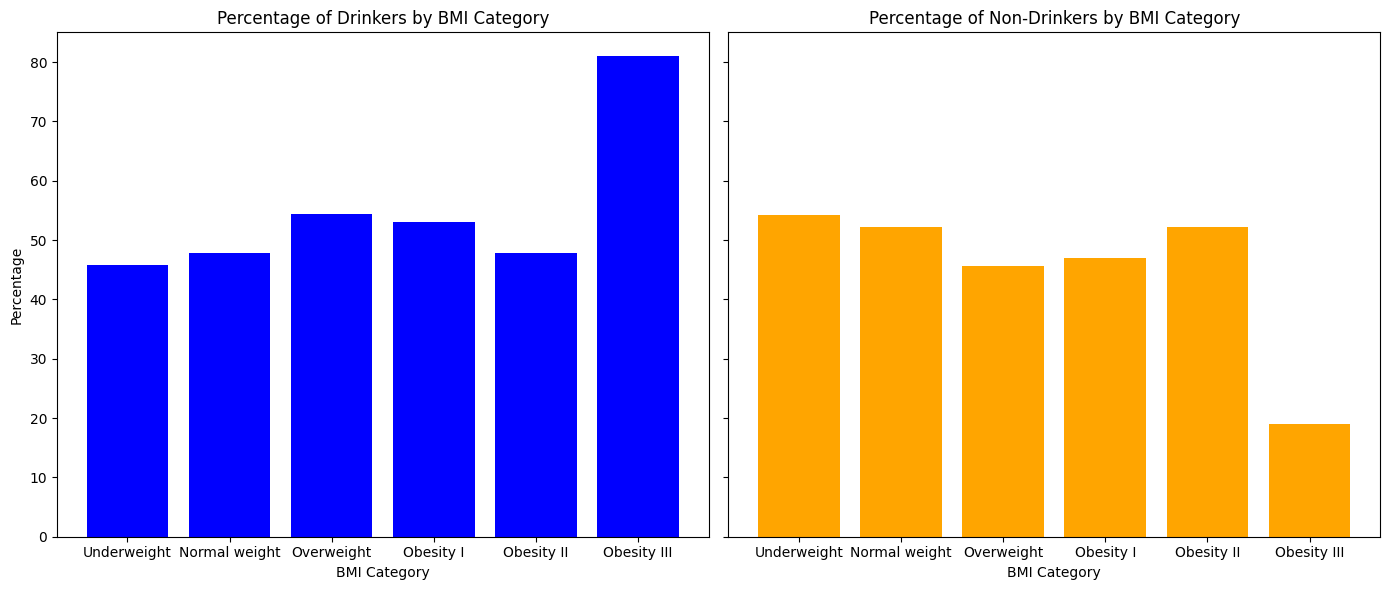

In [33]:

# Define BMI categories based on the range of values (14 to 44)
bins = [14, 18.5, 25, 30, 35, 40, 45]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
sample_df['BMI_category'] = pd.cut(sample_df['BMI'], bins=bins, labels=labels)

# Calculate the total number of people in each BMI category
total_counts = sample_df['BMI_category'].value_counts(sort=False)

# Count the number of drinkers in each BMI category
drinker_counts_bmi = sample_df[sample_df['Drinking_Status'] == '1']['BMI_category'].value_counts(sort=False)

# Calculate the percentage of drinkers within each BMI category
percentage_drinker_bmi = (drinker_counts_bmi / total_counts) * 100

# Count the number of non-drinkers in each BMI category
non_drinker_counts_bmi = sample_df[sample_df['Drinking_Status'] == '0']['BMI_category'].value_counts(sort=False)

# Calculate the percentage of non-drinkers within each BMI category
percentage_non_drinker_bmi = (non_drinker_counts_bmi / total_counts) * 100

# Create side-by-side bar plots to compare the percentage of drinkers and non-drinkers by BMI category
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the percentage of drinkers by BMI category
axs[0].bar(percentage_drinker_bmi.index, percentage_drinker_bmi, color='blue')
axs[0].set_title('Percentage of Drinkers by BMI Category')
axs[0].set_xlabel('BMI Category')
axs[0].set_ylabel('Percentage')

# Plot the percentage of non-drinkers by BMI category
axs[1].bar(percentage_non_drinker_bmi.index, percentage_non_drinker_bmi, color='orange')
axs[1].set_title('Percentage of Non-Drinkers by BMI Category')
axs[1].set_xlabel('BMI Category')

# Adjust the layout to ensure the plots do not overlap
plt.tight_layout()

# Display the side-by-side bar plots
plt.show()


In [34]:
# drinking and Total_HDL_Ratio

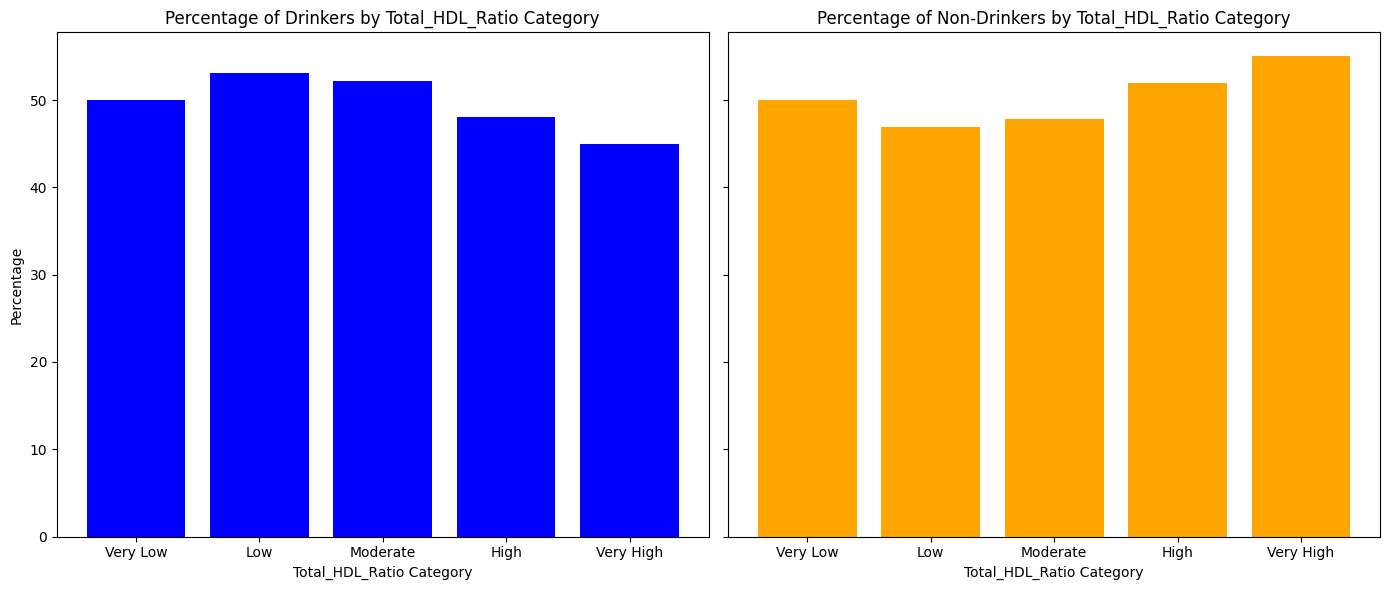

In [36]:

# Define Total_HDL_Ratio categories based on the range of values (-2397 to 921)
bins = [-2400, -1500, -500, 0, 500, 1000]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
sample_df['Total_HDL_Ratio_category'] = pd.cut(sample_df['Total_HDL_Ratio'], bins=bins, labels=labels)

# Calculate the total number of people in each Total_HDL_Ratio category
total_counts = sample_df['Total_HDL_Ratio_category'].value_counts(sort=False)

# Count the number of drinkers in each Total_HDL_Ratio category
drinker_counts_hdl_ratio = sample_df[sample_df['Drinking_Status'] == '1']['Total_HDL_Ratio_category'].value_counts(sort=False)

# Calculate the percentage of drinkers within each Total_HDL_Ratio category
percentage_drinker_hdl_ratio = (drinker_counts_hdl_ratio / total_counts) * 100

# Count the number of non-drinkers in each Total_HDL_Ratio category
non_drinker_counts_hdl_ratio = sample_df[sample_df['Drinking_Status'] == '0']['Total_HDL_Ratio_category'].value_counts(sort=False)

# Calculate the percentage of non-drinkers within each Total_HDL_Ratio category
percentage_non_drinker_hdl_ratio = (non_drinker_counts_hdl_ratio / total_counts) * 100

# Create side-by-side bar plots to compare the percentage of drinkers and non-drinkers by Total_HDL_Ratio category
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the percentage of drinkers by Total_HDL_Ratio category
axs[0].bar(percentage_drinker_hdl_ratio.index, percentage_drinker_hdl_ratio, color='blue')
axs[0].set_title('Percentage of Drinkers by Total_HDL_Ratio Category')
axs[0].set_xlabel('Total_HDL_Ratio Category')
axs[0].set_ylabel('Percentage')

# Plot the percentage of non-drinkers by Total_HDL_Ratio category
axs[1].bar(percentage_non_drinker_hdl_ratio.index, percentage_non_drinker_hdl_ratio, color='orange')
axs[1].set_title('Percentage of Non-Drinkers by Total_HDL_Ratio Category')
axs[1].set_xlabel('Total_HDL_Ratio Category')

# Adjust the layout to ensure the plots do not overlap
plt.tight_layout()

# Display the side-by-side bar plots
plt.show()


In [37]:
# drinking and liver enzyme ratio

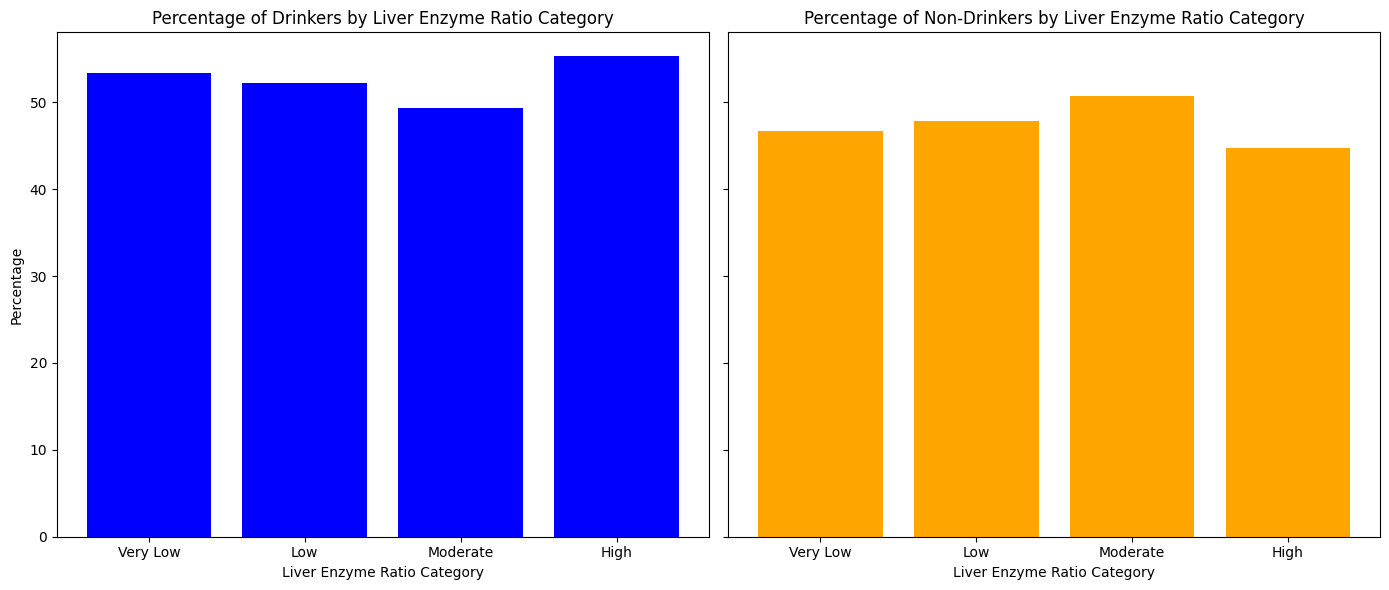

In [38]:

# Define Liver_Enzyme_Ratio categories based on the range of values (-106 to 100)
bins = [-110, -50, 0, 50, 100]
labels = ['Very Low', 'Low', 'Moderate', 'High']
sample_df['Liver_Enzyme_Ratio_category'] = pd.cut(sample_df['Liver_Enzyme_Ratio'], bins=bins, labels=labels)

# Calculate the total number of people in each Liver_Enzyme_Ratio category
total_counts = sample_df['Liver_Enzyme_Ratio_category'].value_counts(sort=False)

# Count the number of drinkers in each Liver_Enzyme_Ratio category
drinker_counts_liver_enzyme = sample_df[sample_df['Drinking_Status'] == '1']['Liver_Enzyme_Ratio_category'].value_counts(sort=False)

# Calculate the percentage of drinkers within each Liver_Enzyme_Ratio category
percentage_drinker_liver_enzyme = (drinker_counts_liver_enzyme / total_counts) * 100

# Count the number of non-drinkers in each Liver_Enzyme_Ratio category
non_drinker_counts_liver_enzyme = sample_df[sample_df['Drinking_Status'] == '0']['Liver_Enzyme_Ratio_category'].value_counts(sort=False)

# Calculate the percentage of non-drinkers within each Liver_Enzyme_Ratio category
percentage_non_drinker_liver_enzyme = (non_drinker_counts_liver_enzyme / total_counts) * 100

# Create side-by-side bar plots to compare the percentage of drinkers and non-drinkers by Liver_Enzyme_Ratio category
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the percentage of drinkers by Liver_Enzyme_Ratio category
axs[0].bar(percentage_drinker_liver_enzyme.index, percentage_drinker_liver_enzyme, color='blue')
axs[0].set_title('Percentage of Drinkers by Liver Enzyme Ratio Category')
axs[0].set_xlabel('Liver Enzyme Ratio Category')
axs[0].set_ylabel('Percentage')

# Plot the percentage of non-drinkers by Liver Enzyme Ratio category
axs[1].bar(percentage_non_drinker_liver_enzyme.index, percentage_non_drinker_liver_enzyme, color='orange')
axs[1].set_title('Percentage of Non-Drinkers by Liver Enzyme Ratio Category')
axs[1].set_xlabel('Liver Enzyme Ratio Category')

# Adjust the layout to ensure the plots do not overlap
plt.tight_layout()

# Display the side-by-side bar plots
plt.show()


In [39]:
# drinking and liver damage score

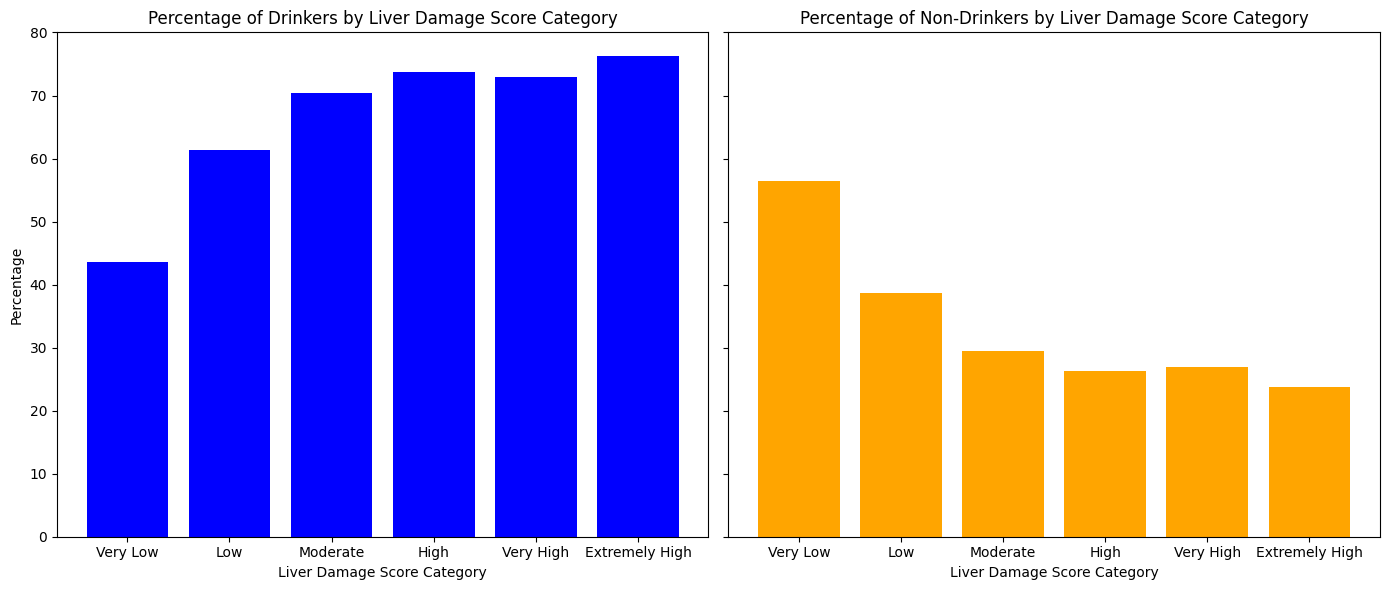

In [41]:
# Define liver_damage_score categories based on the range of values (-1.5 to 10)
bins = [-2, 0, 2, 4, 6, 8, 10]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely High']
sample_df['liver_damage_score_category'] = pd.cut(sample_df['liver_damage_score'], bins=bins, labels=labels)

# Calculate the total number of people in each liver_damage_score category
total_counts = sample_df['liver_damage_score_category'].value_counts(sort=False)

# Count the number of drinkers in each liver_damage_score category
drinker_counts_liver_damage = sample_df[sample_df['Drinking_Status'] == '1']['liver_damage_score_category'].value_counts(sort=False)

# Calculate the percentage of drinkers within each liver_damage_score category
percentage_drinker_liver_damage = (drinker_counts_liver_damage / total_counts) * 100

# Count the number of non-drinkers in each liver_damage_score category
non_drinker_counts_liver_damage = sample_df[sample_df['Drinking_Status'] == '0']['liver_damage_score_category'].value_counts(sort=False)

# Calculate the percentage of non-drinkers within each liver_damage_score category
percentage_non_drinker_liver_damage = (non_drinker_counts_liver_damage / total_counts) * 100

# Create side-by-side bar plots to compare the percentage of drinkers and non-drinkers by liver_damage_score category
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the percentage of drinkers by liver_damage_score category
axs[0].bar(percentage_drinker_liver_damage.index, percentage_drinker_liver_damage, color='blue')
axs[0].set_title('Percentage of Drinkers by Liver Damage Score Category')
axs[0].set_xlabel('Liver Damage Score Category')
axs[0].set_ylabel('Percentage')

# Plot the percentage of non-drinkers by liver_damage_score category
axs[1].bar(percentage_non_drinker_liver_damage.index, percentage_non_drinker_liver_damage, color='orange')
axs[1].set_title('Percentage of Non-Drinkers by Liver Damage Score Category')
axs[1].set_xlabel('Liver Damage Score Category')

# Adjust the layout to ensure the plots do not overlap
plt.tight_layout()

# Display the side-by-side bar plots
plt.show()


In [42]:
# analysis for DorS column

In [43]:
#  sex and DorS

In [47]:
total_gender_counts = sample_df['sex'].value_counts()
total_gender_counts

,count
sex,
Male,53264
Female,46736


In [46]:
counts = sample_df[sample_df['DorS']==1]['sex'].value_counts()
counts

,count
sex,
Male,45600
Female,15190


Percentage of male smokers: 85.61%
Percentage of female smokers: 32.50%


Text(0.5, 1.0, 'Percentage of people Among Male and Female')

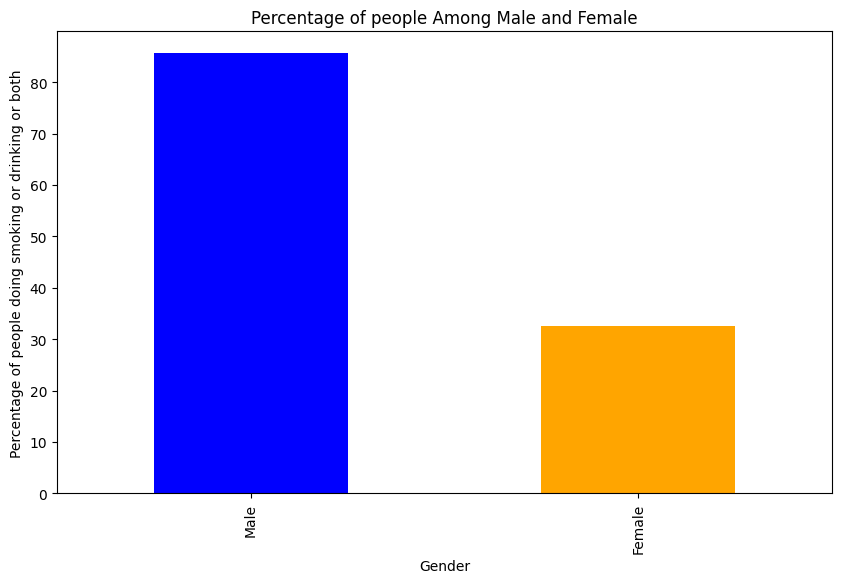

In [49]:

# Calculating the percentage of smokers within each gender group
both_percentage = (counts / total_gender_counts) * 100

# Printing the percentages
print(f"Percentage of male smokers: {both_percentage['Male']:.2f}%")
print(f"Percentage of female smokers: {both_percentage['Female']:.2f}%")

# Plotting the bar plot for percentage distribution
plt.figure(figsize=(10, 6))
both_percentage.plot(kind='bar', color=['blue', 'orange'])

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage of people doing smoking or drinking or both')
plt.title('Percentage of people Among Male and Female')

In [50]:
# age and DorS

age_category
20-29    14238
30-39    21693
40-49    25084
50-59    21891
60-69    10477
70-79     4073
Name: count, dtype: int64


<Axes: xlabel='age_category'>

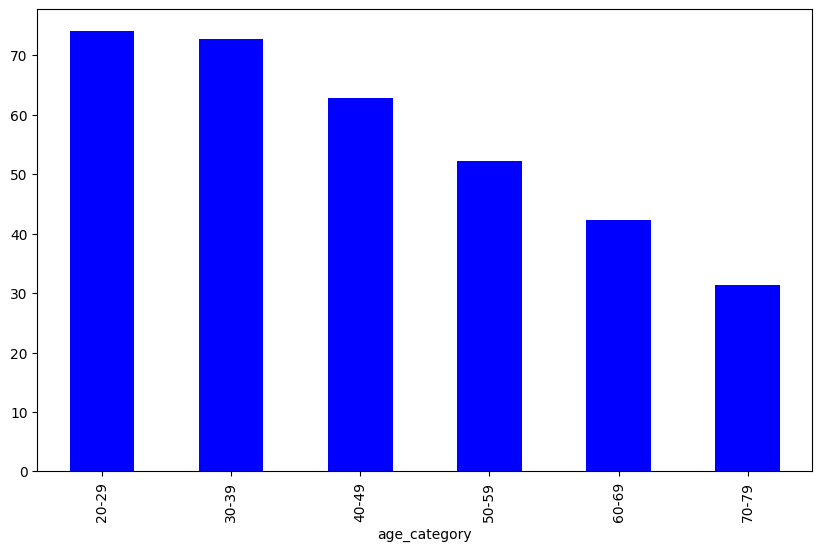

In [52]:
# Define age categories
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
sample_df['age_category'] = pd.cut(sample_df['age'], bins=bins, labels=labels)

# Total number of people in each age category
total_counts = sample_df['age_category'].value_counts(sort=False)
print(total_counts)
# Number of people smoking, drinking, doing both in each age category
both_counts = sample_df[sample_df['DorS']==1]['age_category'].value_counts(sort=False)

# Calculating the percentage of people smoking, drinking, doing both within each age category
percentage_both = (both_counts / total_counts) * 100

# Plotting the bar plot
plt.figure(figsize=(10, 6))
percentage_both.plot(kind='bar', color='blue')

In [53]:
# hemoglobin and both

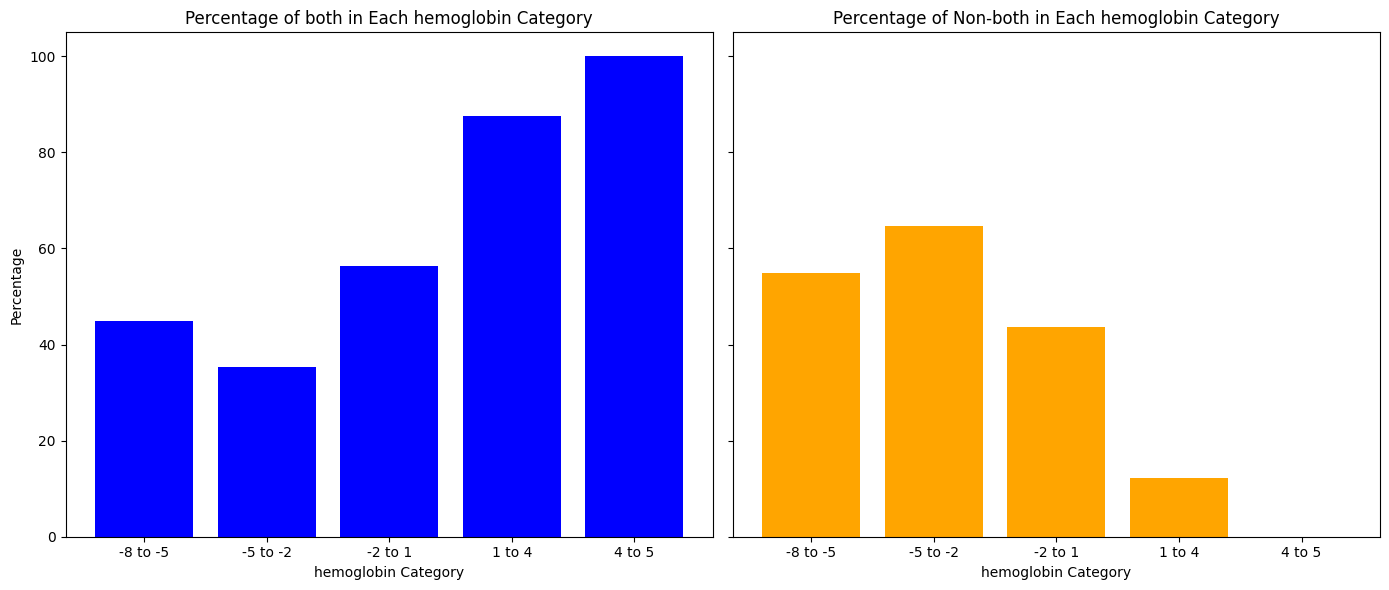

In [58]:
# Define hemoglobin categories
bins = [-8, -5, -2, 1, 4, 5]
labels = ['-8 to -5', '-5 to -2', '-2 to 1', '1 to 4', '4 to 5']
sample_df['hemoglobin_category'] = pd.cut(sample_df['hemoglobin'], bins=bins, labels=labels)

# Total number of people in each gamma-GTP category
total_counts = sample_df['hemoglobin_category'].value_counts(sort=False)

# Number of drinkers in each gamma-GTP category
both_counts_hemo = sample_df[sample_df['DorS'] == 1]['hemoglobin_category'].value_counts(sort=False)

# Calculating the percentage of drinkers within each gamma-GTP category
both_percentage_hemo = (both_counts_hemo / total_counts) * 100

# Number of non-drinkers in each gamma-GTP category
non_both_counts_hemo = sample_df[sample_df['DorS'] == 0]['hemoglobin_category'].value_counts(sort=False)

# Calculating the percentage of non-drinkers within each gamma-GTP category
non_both_percentage_hemo = (non_both_counts_hemo / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the drinker percentages
axs[0].bar(both_percentage_hemo.index, both_percentage_hemo, color='blue')
axs[0].set_title('Percentage of both in Each hemoglobin Category')
axs[0].set_xlabel('hemoglobin Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-drinker percentages
axs[1].bar(non_both_percentage_hemo.index, non_both_percentage_hemo, color='orange')
axs[1].set_title('Percentage of Non-both in Each hemoglobin Category')
axs[1].set_xlabel('hemoglobin Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [59]:
# liver enzyme and both

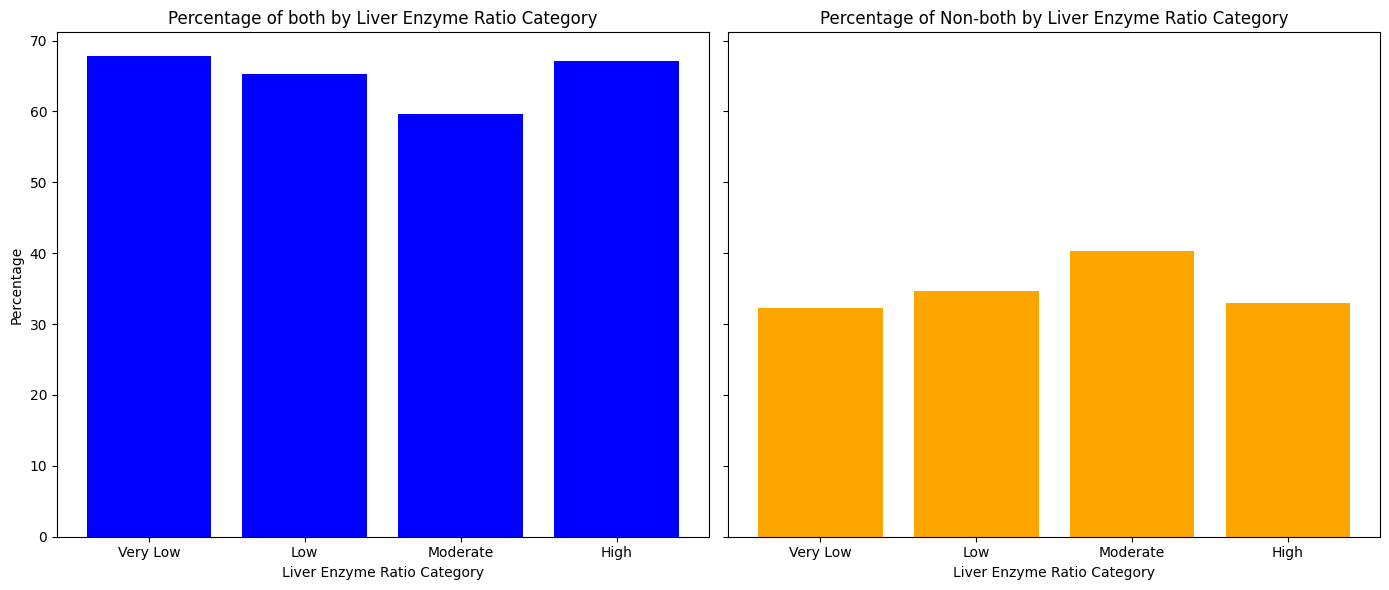

In [61]:
# Define Liver_Enzyme_Ratio categories based on the range of values (-106 to 100)
bins = [-110, -50, 0, 50, 100]
labels = ['Very Low', 'Low', 'Moderate', 'High']
sample_df['Liver_Enzyme_Ratio_category'] = pd.cut(sample_df['Liver_Enzyme_Ratio'], bins=bins, labels=labels)

# Calculate the total number of people in each Liver_Enzyme_Ratio category
total_counts = sample_df['Liver_Enzyme_Ratio_category'].value_counts(sort=False)

# Count the number of both in each Liver_Enzyme_Ratio category
both_counts_liver_enzyme = sample_df[sample_df['DorS'] == 1]['Liver_Enzyme_Ratio_category'].value_counts(sort=False)

# Calculate the percentage of both within each Liver_Enzyme_Ratio category
percentage_both_liver_enzyme = (both_counts_liver_enzyme / total_counts) * 100

# Count the number of non-both in each Liver_Enzyme_Ratio category
non_both_counts_liver_enzyme = sample_df[sample_df['DorS'] == 0]['Liver_Enzyme_Ratio_category'].value_counts(sort=False)

# Calculate the percentage of non-both within each Liver_Enzyme_Ratio category
percentage_non_both_liver_enzyme = (non_both_counts_liver_enzyme / total_counts) * 100

# Create side-by-side bar plots to compare the percentage of drinkers and non-drinkers by Liver_Enzyme_Ratio category
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the percentage of both by Liver_Enzyme_Ratio category
axs[0].bar(percentage_both_liver_enzyme.index, percentage_both_liver_enzyme, color='blue')
axs[0].set_title('Percentage of both by Liver Enzyme Ratio Category')
axs[0].set_xlabel('Liver Enzyme Ratio Category')
axs[0].set_ylabel('Percentage')

# Plot the percentage of non-both by Liver Enzyme Ratio category
axs[1].bar(percentage_non_both_liver_enzyme.index, percentage_non_both_liver_enzyme, color='orange')
axs[1].set_title('Percentage of Non-both by Liver Enzyme Ratio Category')
axs[1].set_xlabel('Liver Enzyme Ratio Category')

# Adjust the layout to ensure the plots do not overlap
plt.tight_layout()

# Display the side-by-side bar plots
plt.show()
